# Lab 1: Spam Classifier
##### By: Tyler Faulkner, Tiffany, 
##### ML Productions
##### Dr. Nowling

## Library Import

In [1]:
import glob
import json
import numpy as np
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_curve
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Importing Data

In [2]:
dataset_path = './email_json_dataset1'
files = glob.glob(pathname=dataset_path + '/'+'*.json', recursive=False)

In [3]:
jsons = []
for file in files:
    filepath = file
    f = open(filepath,)
    jsons.append(json.load(f))
dataframe = pd.DataFrame.from_records(jsons)
print(dataframe.head())

  label                       to_address  \
0  spam        the00@speedy.uwaterloo.ca   
1   ham  debian-mirrors@lists.debian.org   
2  spam         <the00@plg.uwaterloo.ca>   
3  spam         opt4@speedy.uwaterloo.ca   
4  spam     ktwarwic@speedy.uwaterloo.ca   

                                        from_address  \
0                 "Tomas Jacobs" <RickyAmes@aol.com>   
1         Yan Morin <yan.morin@savoirfairelinux.com>   
2  "Sheila Crenshaw" <7stocknews@tractionmarketin...   
3       "Stormy Dempsey" <vqucsmdfgvsg@ruraltek.com>   
4         "Christi T. Jernigan" <dcube@totalink.net>   

                                             subject  \
0                  Generic Cialis, branded quality@    
1                             Typo in /debian/README   
2                                   authentic viagra   
3                               Nice talking with ya   
4  or trembling; stomach cramps; trouble in sleep...   

                                                body  
0  \n\

## Count Vectorizer

In [4]:
vectorizer = CountVectorizer(min_df=10)
X = vectorizer.fit_transform(dataframe['body'].to_numpy())
print('Size of the array', X.shape)

Size of the array (63542, 32144)


In [5]:
svd = TruncatedSVD(n_components=8)
X_reduced = svd.fit_transform(X)
print(X_reduced.shape)

(63542, 8)


In [6]:
logreg = LogisticRegression(max_iter=150)  
skf = StratifiedKFold(n_splits=3)
y = dataframe['label'].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X_reduced, y, test_size=0.1)
#print(y_train)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=150)

## Model Analysis

### ROC Curve

In [7]:
prob = logreg.predict_proba(X_val)
y_pred_prob = prob[:,1]
print(y_pred_prob.shape)
print(np.unique(y_val))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob, pos_label='spam')

(6355,)
['ham' 'spam']


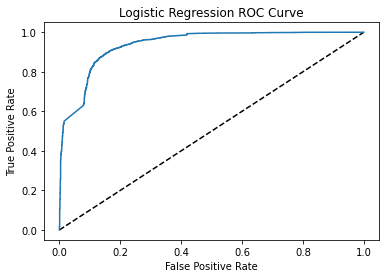

In [8]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logisitc Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

### Confusion Matrix

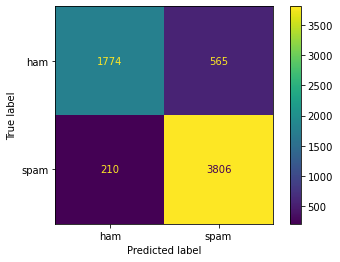

In [9]:
plot_confusion_matrix(logreg, X_val, y_val)

### Accuracy, Recall, Precison

In [14]:
y_pred = logreg.predict(X_val)
matrix = confusion_matrix(y_val, y_pred)
tp = matrix[1][1]
tn = matrix[0][0]
fp = matrix[0][1]
fn = matrix[1][0]

print('Accuracy:', (tp+tn)/(tp+tn+fn+fp))
print('Recall:', (tp)/(tp+fp))
print('Precision:', (tp)/(tp+fn))

Accuracy: 0.8780487804878049
Recall: 0.8707389613360788
Precision: 0.9477091633466136
